# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
# print(flight.head())

## Task 1


print ("Minimum Coach ticket price: $", flight['coach_price'].min())
print ("Maximum Coach ticket price: $", flight['coach_price'].max())
print ("Average Coach ticket price: $", flight['coach_price'].mean())

print("\nSummary Statistics: \n")
print(flight.describe())


Minimum Coach ticket price: $ 44.415
Maximum Coach ticket price: $ 593.635
Average Coach ticket price: $ 376.58525308213905

Summary Statistics: 

               miles     passengers          delay    coach_price  \
count  129780.000000  129780.000000  129780.000000  129780.000000   
mean     2006.224696     207.723155      13.162845     376.585253   
std       943.034768      12.776363      41.941680      67.744274   
min        12.000000     135.000000       0.000000      44.415000   
25%      1343.000000     204.000000       9.000000     331.445000   
50%      1986.000000     210.000000      10.000000     380.560000   
75%      2468.000000     215.000000      13.000000     426.676250   
max      4548.000000     244.000000    1560.000000     593.635000   

       firstclass_price          hours  
count     129780.000000  129780.000000  
mean        1454.931785       3.631214  
std          162.590434       1.739118  
min          939.100000       1.000000  
25%         1302.200000   

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [7]:
## Task 2

# since coach_price is quantitative variable, we can use either box plot or histogram

# print(flight.head())

eight_hours_travel = flight[flight['hours'] == 8]

# print(eight_hours_travel)

print(eight_hours_travel.describe())


             miles   passengers        delay  coach_price  firstclass_price  \
count  2634.000000  2634.000000  2634.000000  2634.000000       2634.000000   
mean   4207.205771   207.270691    14.167426   431.834377       1571.496572   
std      69.083475    13.098447    57.863457    64.083280        153.833271   
min    4125.000000   148.000000     0.000000   170.770000       1128.770000   
25%    4154.000000   203.000000     9.000000   390.266250       1415.645000   
50%    4190.000000   209.000000    10.000000   437.115000       1632.905000   
75%    4243.000000   215.000000    13.000000   480.043750       1693.000000   
max    4548.000000   233.000000  1509.000000   593.635000       1846.140000   

        hours  
count  2634.0  
mean      8.0  
std       0.0  
min       8.0  
25%       8.0  
50%       8.0  
75%       8.0  
max       8.0  


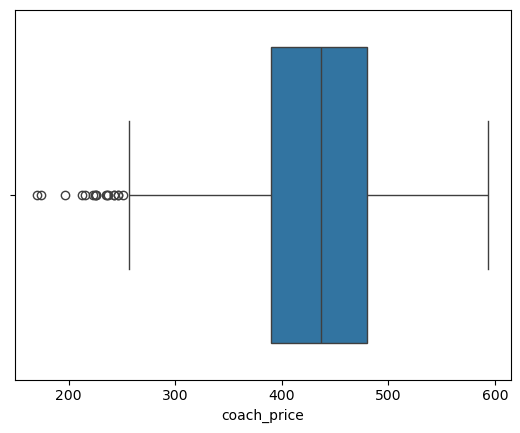

In [8]:
## Box plot visual

sns.boxplot(x='coach_price', data=eight_hours_travel)
plt.show()

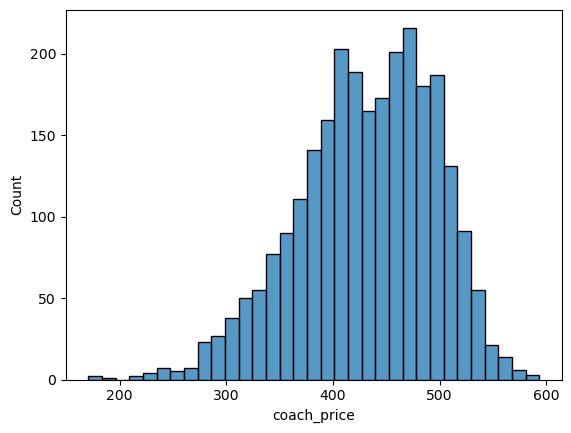

In [9]:
## Histogram visual

sns.histplot(x='coach_price', data=eight_hours_travel)
plt.show()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [11]:
## Task 3

print("Flights Delay Times Summary Statistics: \n")
print(flight['delay'].describe())

Flights Delay Times Summary Statistics: 

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64


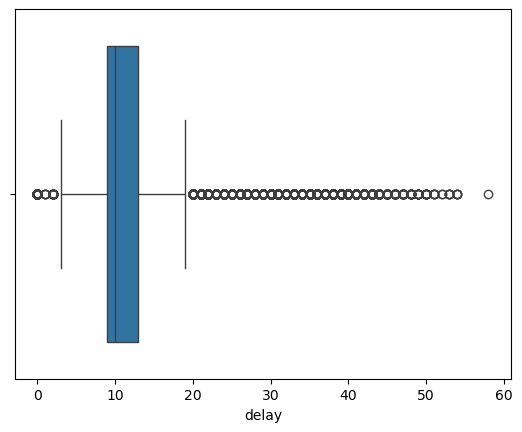

In [12]:
# box plot visual

sns.boxplot(x='delay', data=flight[flight.delay <= 1000])
plt.show()

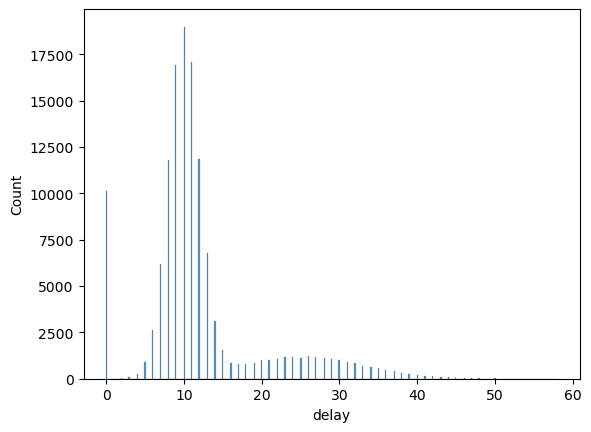

In [13]:
# histogram visual

sns.histplot(x='delay', data=flight[flight.delay <= 1000])
plt.show()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

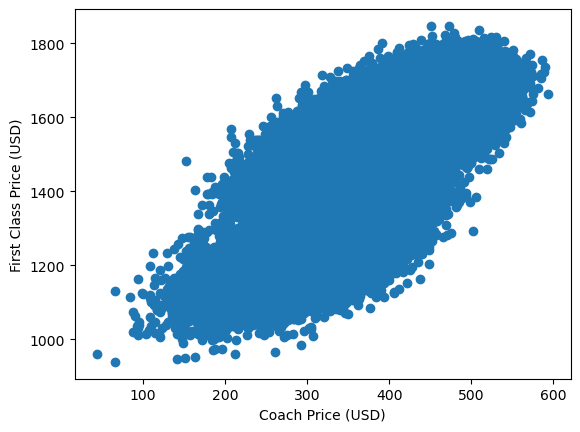

In [16]:
## Task 4

# since both coach_price and first class price are quantitative variable (bivariate), 
# we can use either scatterplot


plt.scatter(x = flight.coach_price, y = flight.firstclass_price)
plt.xlabel('Coach Price (USD)')
plt.ylabel('First Class Price (USD)')
plt.show()



In [17]:
# finding covariance and correlaation to prove the "positive association" between coach price and first class price

print("The Covariance between Coach price and First class price: \n")

cov_coach_firstclass = np.cov(flight.coach_price, flight.firstclass_price)
print(cov_coach_firstclass)

# Covariance: 8357

print("\n\n The Correlation between Coach price and First class price: \n")

from scipy.stats import pearsonr
corr_coach_firstclass, p = pearsonr(flight.coach_price, flight.firstclass_price)
print(corr_coach_firstclass)

# Correlation: 0.76 (Strong linear association)


# Imp Note:
# ==========
# Generally, a correlation larger than about .3 indicates a linear association. 
# A correlation greater than about .6 suggestions a strong linear association. 



The Covariance between Coach price and First class price: 

[[ 4589.28671989  8357.37836435]
 [ 8357.37836435 26435.64923953]]


 The Correlation between Coach price and First class price: 

0.7587565939365978


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

Mean price - Coach Price w/ Inflight meals:
390.09980701619315

Mean price - Coach Price w/o Inflight meals:
370.7862857190049

Mean difference:
19.31352129718823

Median price - Coach Price w/ Inflight meals:
394.055

Median price - Coach Price w/o Inflight meals:
374.895

Median difference:
19.160000000000025





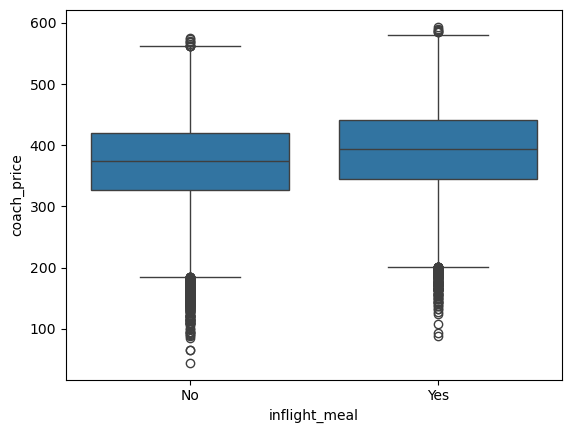

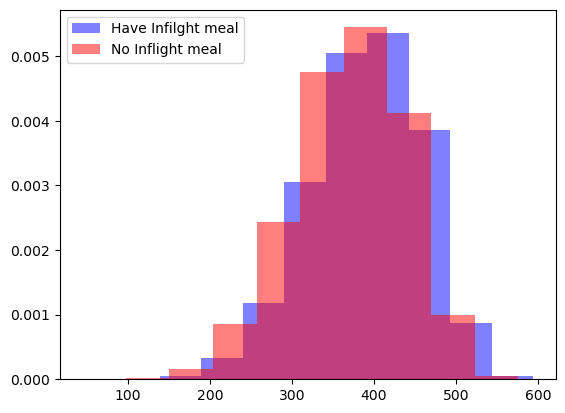

In [19]:
## Task 5

# 1. Relationship b/w Coach Price and Inflight Meals - Quantitative & categorical

# print(flight.head())

#taking coach price column alone for our analysis

coachprice_meal = flight.coach_price[flight.inflight_meal == "Yes"]
coachprice_nomeal = flight.coach_price[flight.inflight_meal == "No"]


#calculate means for each group:
coachprice_meal_mean = np.mean(coachprice_meal)
coachprice_nomeal_mean = np.mean(coachprice_nomeal)

#print mean prices:
print('Mean price - Coach Price w/ Inflight meals:')
print(coachprice_meal_mean)
print('\nMean price - Coach Price w/o Inflight meals:')
print(coachprice_nomeal_mean)

#calculate mean difference:
mean_diff = coachprice_meal_mean - coachprice_nomeal_mean

#print mean difference
print('\nMean difference:')
print(mean_diff)

#calculate medians for each group:
coachprice_meal_median = np.median(coachprice_meal)
coachprice_nomeal_median = np.median(coachprice_nomeal)

#print median prices
print('\nMedian price - Coach Price w/ Inflight meals:')
print(coachprice_meal_median)
print('\nMedian price - Coach Price w/o Inflight meals:')
print(coachprice_nomeal_median)

#calculate median difference
median_diff = coachprice_meal_median - coachprice_nomeal_median

#print median difference
print('\nMedian difference:')
print(median_diff)



## side by side box plot - to identify the spread

print("\n\n")
sns.boxplot(data = flight, x = 'inflight_meal', y = 'coach_price')
plt.show()


print("\n\n")

## overlaping histogram

plt.hist(coachprice_meal , color="blue", label="Have Infilght meal", density=True, alpha=0.5)
plt.hist(coachprice_nomeal , color="red", label="No Inflight meal", density=True, alpha=0.5)
plt.legend()
plt.show()

Mean price - Coach Price w/ Inflight entertainment:
390.48814924827946

Mean price - Coach Price w/o Inflight entertainment:
320.4229945246971

Mean difference:
70.06515472358234

Median price - Coach Price w/ Inflight entertainment:
395.14

Median price - Coach Price w/o Inflight entertainment:
325.42

Median difference:
69.71999999999997





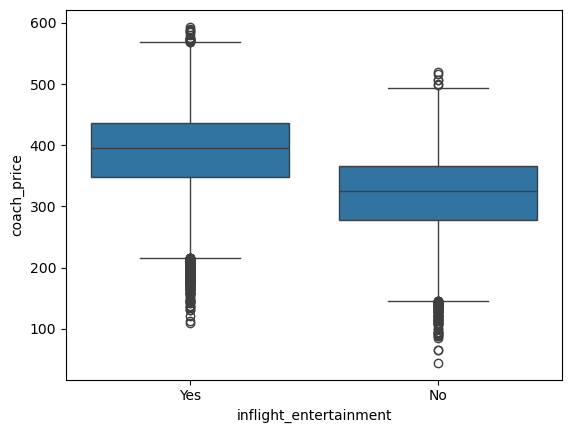

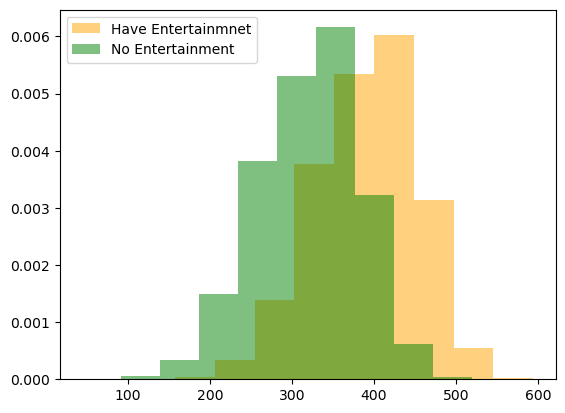

In [20]:

## Task 5

# 1. Relationship b/w Coach Price and Inflight Entertainment - Quantitative & categorical

# print(flight.head())

#taking coach price column alone for our analysis

coach_entertain = flight.coach_price[flight.inflight_entertainment == "Yes"]
coach_noentertain = flight.coach_price[flight.inflight_entertainment == "No"]


#calculate means for each group:
coach_entertain_mean = np.mean(coach_entertain)
coach_noentertain_mean = np.mean(coach_noentertain)

#print mean prices:
print('Mean price - Coach Price w/ Inflight entertainment:')
print(coach_entertain_mean)
print('\nMean price - Coach Price w/o Inflight entertainment:')
print(coach_noentertain_mean)

#calculate mean difference:
mean_diff = coach_entertain_mean - coach_noentertain_mean

#print mean difference
print('\nMean difference:')
print(mean_diff)

#calculate medians for each group:
coach_entertain_median = np.median(coach_entertain)
coach_noentertain_median = np.median(coach_noentertain)

#print median prices
print('\nMedian price - Coach Price w/ Inflight entertainment:')
print(coach_entertain_median)
print('\nMedian price - Coach Price w/o Inflight entertainment:')
print(coach_noentertain_median)

#calculate median difference
median_diff = coach_entertain_median - coach_noentertain_median

#print median difference
print('\nMedian difference:')
print(median_diff)



## side by side box plot - to identify the spread

print("\n\n")
sns.boxplot(data = flight, x = 'inflight_entertainment', y = 'coach_price')
plt.show()


print("\n\n")

## overlaping histogram

plt.hist(coach_entertain , color="orange", label="Have Entertainmnet", density=True, alpha=0.5)
plt.hist(coach_noentertain , color="green", label="No Entertainment", density=True, alpha=0.5)
plt.legend()
plt.show()

Mean price - Coach Price w/ Inflight Wifi:
383.65137462960104

Mean price - Coach Price w/o Inflight Wifi:
313.1856258644537

Mean difference:
70.46574876514734

Median price - Coach Price w/ Inflight Wifi:
387.62

Median price - Coach Price w/o Inflight Wifi:
317.9875

Median difference:
69.6325





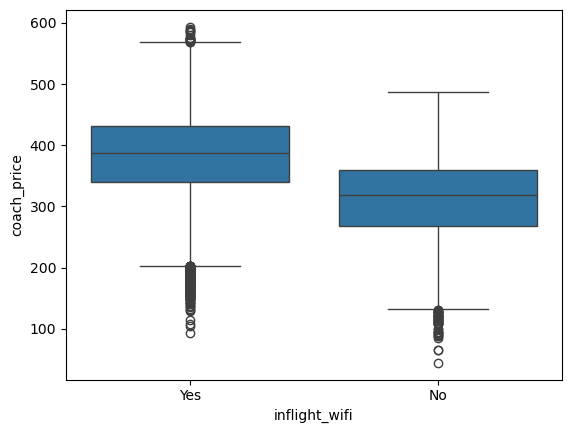

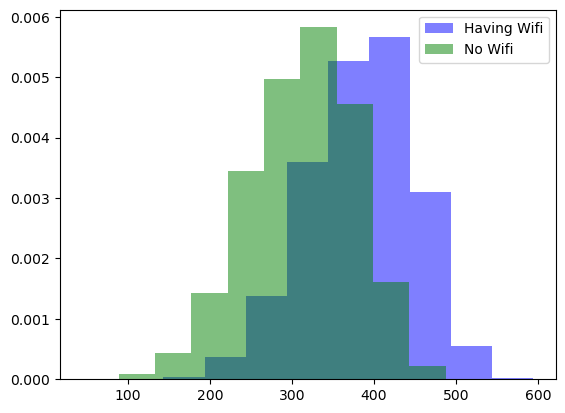

In [21]:

## Task 5

# 1. Relationship b/w Coach Price and Inflight Wifi - Quantitative & categorical

# print(flight.head())

#taking coach price column alone for our analysis

coach_wifi = flight.coach_price[flight.inflight_wifi == "Yes"]
coach_nowifi = flight.coach_price[flight.inflight_wifi == "No"]


#calculate means for each group:
coach_wifi_mean = np.mean(coach_wifi)
coach_nowifi_mean = np.mean(coach_nowifi)

#print mean prices:
print('Mean price - Coach Price w/ Inflight Wifi:')
print(coach_wifi_mean)
print('\nMean price - Coach Price w/o Inflight Wifi:')
print(coach_nowifi_mean)

#calculate mean difference:
mean_diff = coach_wifi_mean - coach_nowifi_mean

#print mean difference
print('\nMean difference:')
print(mean_diff)

#calculate medians for each group:
coach_wifi_median = np.median(coach_wifi)
coach_nowifi_median = np.median(coach_nowifi)

#print median prices
print('\nMedian price - Coach Price w/ Inflight Wifi:')
print(coach_wifi_median)
print('\nMedian price - Coach Price w/o Inflight Wifi:')
print(coach_nowifi_median)

#calculate median difference
median_diff = coach_wifi_median - coach_nowifi_median

#print median difference
print('\nMedian difference:')
print(median_diff)



## side by side box plot - to identify the spread

print("\n\n")
sns.boxplot(data = flight, x = 'inflight_wifi', y = 'coach_price')
plt.show()


print("\n\n")

## overlaping histogram

plt.hist(coach_wifi , color="blue", label="Having Wifi", density=True, alpha=0.5)
plt.hist(coach_nowifi , color="green", label="No Wifi", density=True, alpha=0.5)
plt.legend()
plt.show()

6. How does the number of passengers change in relation to the length of flights?

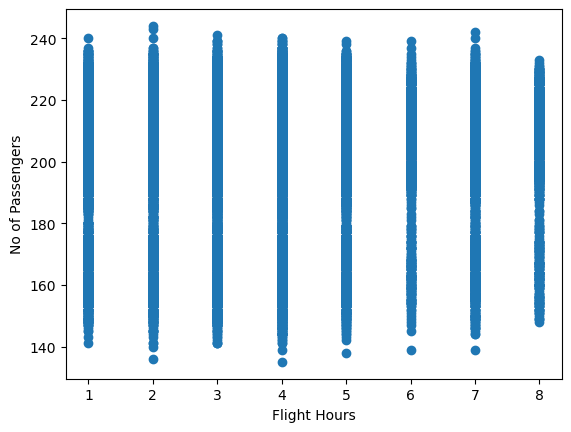

In [23]:
## Task 6

# since both No of passengers and flight hours are quantitative variable (bivariate), 
# we can use either scatterplot


plt.scatter(x = flight.hours, y = flight.passengers)
plt.xlabel('Flight Hours')
plt.ylabel('No of Passengers')
plt.show()

In [24]:
# finding covariance and correlaation to prove the "positive association" between Flight hours and No of Passengers

print("The Covariance between Flight hours and No of Passengers: \n")

cov_hours_passengers = np.cov(flight.hours, flight.passengers)
print(cov_hours_passengers)

# Covariance: −0.0873954889



print("\n\n The Correlation between Flight hours and No of Passengers: \n")

corr_hours_passengers, p = pearsonr(flight.hours, flight.passengers)
print(corr_coach_firstclass)

# Correlation: 0.76 (Strong linear association)


# Imp Note:
# ==========
# Generally, a correlation larger than about .3 indicates a linear association. 
# A correlation greater than about .6 suggestions a strong linear association. 



The Covariance between Flight hours and No of Passengers: 

[[ 3.02453055e+00 -8.73954889e-02]
 [-8.73954889e-02  1.63235456e+02]]


 The Correlation between Flight hours and No of Passengers: 

0.7587565939365978


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

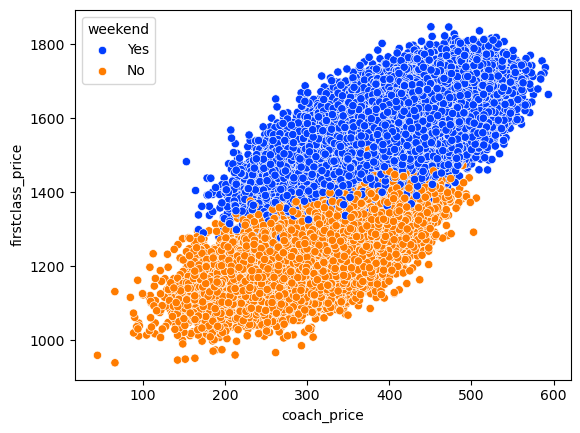

In [27]:
## Task 7

# 1. Scatter plots with visual cues

sns.scatterplot(x = 'coach_price', y = 'firstclass_price', hue = 'weekend', palette = 'bright', data = flight)
plt.show()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

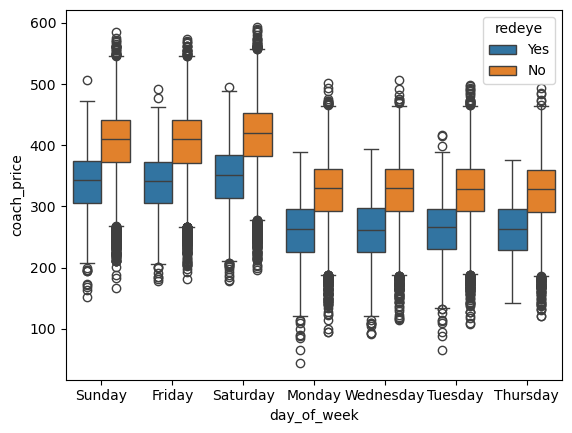

In [29]:
## Task 8

# side by side box plot showing relationship between coach price and redeyes grouped by each day of week
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()


